# Classification

### first steps: 
- upload data
- select variables
- transform the dichatomic variable (Y) in factor
- boxplot between variables in order to check some relationships
- use the models (logistic regression and LDA)


In [1]:
data(mtcars)
names(mtcars)

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

In [2]:
#se vuoi caricare dataset (primo se c'è di default secondo da un file csv):

# mydata<-data(nome dataset) 
#  mydata<-nome dataset


# mydata<-read.csv("nome file.csv", sep= ",")

In [3]:
cars.data<- mtcars[, c("mpg","vs","am")]
cars.data[1:3,]

,mpg,vs,am
Mazda RX4,21.0,0,1
Mazda RX4 Wag,21.0,0,1
Datsun 710,22.8,1,1


In [22]:
dim(cars.data)

[1] 32  3

In [23]:
# estrarre le variabili che vuoi

#mydata<-mydata[,c("nome colonna1","nome colonna 2", "nome colonna 3", ecc)]

# verifica correttezza subset:
# mydata[1:3,]

#verifica dimensione subset:
#dim(mydata)

## AGGIUNGERE VARIABILE
#new.variable <- rep(1, length(mydata$y))

## substitute 0 to the ones corresponding to cars with mpg lower than the med
#new.variable [mydata$y < VALORE] <- 0
## create the dataset we need


#if you want to add a new variable into a mydata
#mydata<-data.frame(name_variable=new.variable,mydata[,c("nome colonna1","nome colonna 2", "nome colonna 3", ecc)])

In [24]:
is.factor(cars.data$am)
cars.data$am<-as.factor(cars.data$am)


[1] FALSE

In [25]:
# devi trasformare la variabile dicatomica (cioe quella delle label associate alle classi) X2  in factor se non ce l hai gia cosi

# is.factor(mydata$variabileX2)
# mydata$variabileY<-as.factor(mydata$variabileX2)


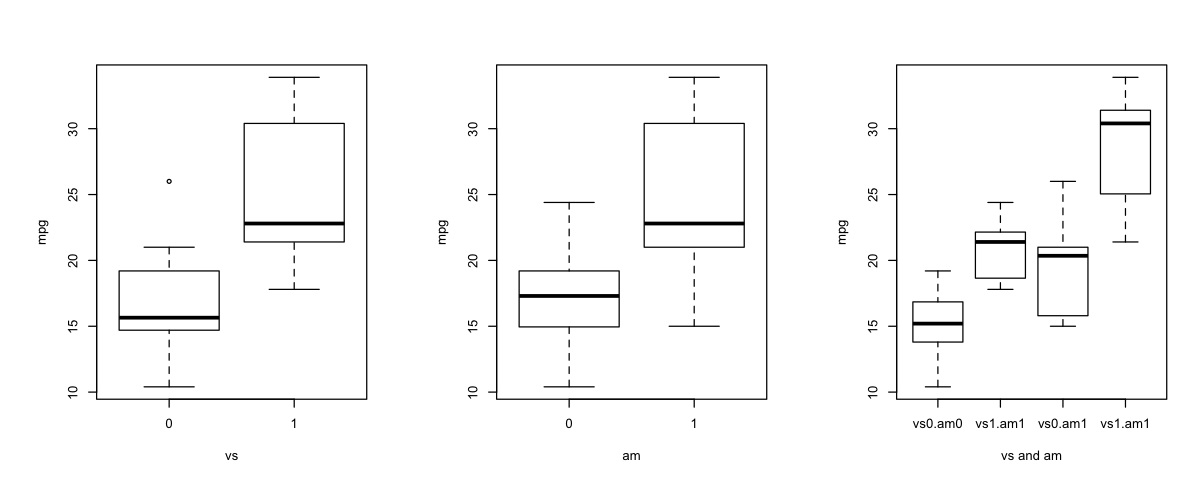

In [127]:

options(repr.plot.width = 10, repr.plot.height = 4)
    par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,3))
boxplot(cars.data$mpg ~ cars.data$vs, xlab= "vs", ylab="mpg")
boxplot(cars.data$mpg ~ cars.data$am, xlab= "am", ylab="mpg")
boxplot(cars.data$mpg ~ cars.data$vs*cars.data$am, xlab= "vs and am", ylab="mpg", names=c("vs0.am0","vs1.am1","vs0.am1","vs1.am1"))

commment: we se that for vs=0 we got less mpg than vs=1. same consideation for am.

In [55]:
#plot boxplot diverse variabili :

#options(repr.plot.width = 10, repr.plot.height = 4)
  #  par(mar = c(5.1, 6.1, 4.1, 2.1))
   # par(mfrow=c(1,3))

#plot variabile X contro prima variabile dichotomica
# boxplot(mydata$X~ mydata$Y, xlab= "nome Y", ylab="nome Y", main="boxplot nome x vs nome Y", col="lightblue")

#plot variabile X contro la seconda variabile dichotomica
# boxplot(mydata$X~ mydata$X2, xlab= "nome x", ylab="nome X2", main="boxplot nome x vs nome x2", col="red")


#plot variabile X contro prodotto variabili per diverse combinazioni
#boxplot(mydata$X ~ mydata$Y*mydata$x2, xlab= "Y and x2", ylab="X", names=c("Y0.x20","Y1.x20","Y0.x21","x21.Y1"), main= " Boxplot of ...")



##COMMENTARE RISULTATI

#### comment

## Classification with Logistic Regression Model

### YOU HAVE TO USE THIS APPROACH JUST FOR THE CLASSIFICATION OF TWO CLASSES!!

### steps:
- fit with all covariates and interactions using $glm$ function
- fit with all covariates without interactions using $glm$ function
- estimate the coefficients, sd of them and Confidence interval
- hypothesis test on one or more covariates'parameters $\beta$ ( if asked)
- evaluate the accuracy of the model (preliminary before anova())
- try another model without some covariates (based on p-value of the fits made before), the ones with the highest p-value
- using $anova()$ function to compare models and to choose the best one
- predict the values usign the best model. Since you have probabilities specifies that you have are based on $P(y=1|x)= \frac{e^{x}}{1+e^{x}}$
- plot the prediction
- evaluating the performances using confusion matrix
- evaluating the model considering test set and training set


In [103]:
model.cars<- glm (vs ~ mpg*am, data=cars.data, family= binomial)
summary(model.cars)


Call:
glm(formula = vs ~ mpg * am, family = binomial, data = cars.data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.70566  -0.31124  -0.04817   0.28038   1.55603  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -20.4784    10.5525  -1.941   0.0523 .
mpg           1.1084     0.5770   1.921   0.0547 .
am1          10.1055    11.9104   0.848   0.3962  
mpg:am1      -0.6637     0.6242  -1.063   0.2877  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 19.125  on 28  degrees of freedom
AIC: 27.125

Number of Fisher Scoring iterations: 7


In [104]:
# regression fit with all covariates and interactions of them
# model.mydata<- glm( y ~ x1*x2, data=mydata, family=binomial)

# result of the regression fit
# summary (model.mydata)

In [106]:
model.cars2<- glm (vs ~ mpg+am, data=cars.data, family= binomial)
summary(model.cars2)


Call:
glm(formula = vs ~ mpg + am, family = binomial, data = cars.data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.05888  -0.44544  -0.08765   0.33335   1.68405  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -12.7051     4.6252  -2.747  0.00602 **
mpg           0.6809     0.2524   2.698  0.00697 **
am1          -3.0073     1.5995  -1.880  0.06009 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 20.646  on 29  degrees of freedom
AIC: 26.646

Number of Fisher Scoring iterations: 6


comment: we see much more significance now even if $am$ is questionable

In [81]:
# regression fit with all covariates without interactions of them
# model.mydata2<- glm( y ~ x1+x2, data=mydata, family=binomial)

# result of the regression fit
# summary (model.mydata2)

#COMMENTARE (vedere se ci sono più asterischi (maggiore significatività) se qualche variabile ha i puntini il che puo 
# volere dire che la sua significatività è discutibile e così via)

#### comment

In [82]:
print("coefficient")

estimate<- coef(model.cars)
estimate

print("errors")
sd<-sqrt(diag(vcov(model.cars)))
sd

print("confint")
confint.default(model.cars,level=0.9)

[1] "coefficient"


(Intercept)         mpg         am1     mpg:am1 
-20.4784114   1.1083824  10.1055086  -0.6637037

[1] "errors"


(Intercept)         mpg         am1     mpg:am1 
 10.5525368   0.5769644  11.9103611   0.6242257

[1] "confint"


,5 %,95 %
(Intercept),-37.8357900,-3.1210329
mpg,0.1593604,2.0574043
am1,-9.4852921,29.6963092
mpg:am1,-1.6904636,0.3630562


In [83]:
cat("coefficient")

estimate<- coef(model.cars2)
estimate

cat("errors")
sd<-sqrt(diag(vcov(model.cars2)))
sd

cat("confint")
confint.default(model.cars2,level=0.9)

coefficient

(Intercept)         mpg         am1 
-12.7051158   0.6809205  -3.0072739

errors

(Intercept)         mpg         am1 
  4.6252123   0.2523749   1.5994800

confint

,5 %,95 %
(Intercept),-20.3129130,-5.0973186
mpg,0.2658008,1.0960402
am1,-5.6381843,-0.3763634


In [78]:
# compute coefficients, sd of them and CI

#model 1
#cat("MODEL 1","\n")
#cat("coefficient")

#estimate<- coef(model.mydata)
#estimate

#cat("errors")
#sd<-sqrt(diag(vcov(model.mydata)))
#sd

#cat("confint")
#confint.default(model.mydata,level=0.9)

#model 2
#cat("MODEL 2","\n")
#cat("coefficient")

#estimate2<- coef(model.mydata2)
#estimate2

#cat("errors")
#sd2<-sqrt(diag(vcov(model.mydata2)))
#sd2

#cat("confint")
#confint.default(model.mydata2,level=0.9)

In [128]:
zeta<-(estimate[2]-1)/sd[2]
zeta

cat('quantile:',qnorm(0.01))

cat("\n")
cat("\n")
cat('p-value',pnorm(zeta))

mpg 
-1.264308

quantile: -2.326348

p-value 0.1030598

we cannot reject the H0 ($\beta$ of mpg=1 ) because zeta>qnorm

In [ ]:
# hypothesis test on beta of one or more covariates
# the estimate depends on the model (you could have estimate2 or sd2[2])
# zeta<-(estimate[2]-valore_beta_test_fornito/sd[2])


#cat('quantile:',qnorm(0.01))


#cat('p-value',pnorm(zeta))

#COMMENTA: a seconda del test puoi rigettare o no l'ipotesi, devi confrontare zeta e qnorm

#### comment

In [110]:
1-pchisq(20.646,29)

[1] 0.8717172

 the p-value associated to the residual deviance indicates that the model 2 is a good of the saturated model , so it is acceptable.

In [112]:
# accuracy of the model (you obtain the quantity in the fit), It is a way to select the model between 1 and 2
# 1- pchisq(residual deviance,degrees of freedom)

# if 1- pchisq(residual deviance,degrees of freedom) 
#circa 1 o approssimabile ad 1 alla prima cifra, ok model is good otherwise is not (accuracy alta)


# se valore differenza alto COMMENTA CON : the p-value associated to the residual deviance indicates that the model 2 is a good of the saturated model , so it is acceptable
#altrimenti gira la frase al negativo

# in alternativa calcoli differenze tra le residual deviances dei due modelli. se la differenza è maggiore di qchisq(0.95,differenza tra degrees of freedom per le residuals dei due modelli)
# non passi al modello 2 altrimenti si, usando magari frase sopra "the p-value associated.." se quel valore è circa 1

In [133]:
model.cars3<-glm( vs ~ mpg, data=cars.data, family=binomial)
summary(model.cars3)


Call:
glm(formula = vs ~ mpg, family = binomial, data = cars.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2127  -0.5121  -0.2276   0.6402   1.6980  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -8.8331     3.1623  -2.793  0.00522 **
mpg           0.4304     0.1584   2.717  0.00659 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 25.533  on 30  degrees of freedom
AIC: 29.533

Number of Fisher Scoring iterations: 6


In [134]:
#new fit with model with less covariates
# model.mydata3<-glm( y ~ x, data=mydata, family=binomial)
# summary(mydata3)

In [155]:
anova(model.cars2,model.cars, test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
29,20.64629,NA,NA,NA
28,19.12489,1,1.521399,0.2174079


In [151]:
anova(model.cars3,model.cars2, test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
30,25.53334,NA,NA,NA
29,20.64629,1,4.887042,0.027059


given the output we can see that we mantain the model.cars2. The comparison between model 1 and 2 where made before. Another way to do this is to compute the difference between the resisual deviances, compare it with qchisq(0.95,difference degree of freedom) and check if it is higher we don't pass to model 2 otherwise we pass

In [156]:
# Anova  comparison

#anova(model.mydata2,model.mydata, test="Chisq")

# you look at Pr. If you have a NA and another one you choose the one with value (the another one). In the case of pr<0.05 you choose the model with this pr.

In [158]:
est.values<-predict(model.cars)
est.values

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
         -1.0346511          -1.0346511          -0.2342295           3.2409715 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
          0.2483391          -0.4166903          -4.6285434           6.5661187 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
          4.7927069           0.8025303          -0.7492050          -2.3009404 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
         -1.3033962          -3.6309992          -8.9512347          -8.9512347 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
         -4.1851904           4.0346856           3.1453283           4.7017036 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
          3.3518098          -3.2984845          -3.6309992          -5.7369258 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
          0.8025303           1.7668245           1.1887422           3.1453283 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
         -3.3469801          -1.6127333          -3.7027230          -0.8567796

In [159]:
est.probs<-predict(model.cars,type="response")
est.probs

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
       0.2621833912        0.2621833912        0.4417088887        0.9623473290 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
       0.5617676561        0.3973089973        0.0096744688        0.9985947288 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
       0.9917781718        0.6905154759        0.3209945437        0.0910451096 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
       0.2135939920        0.0258061058        0.0001295603        0.0001295603 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
       0.0149911526        0.9826162982        0.9587242487        0.9910019053 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
       0.9661640493        0.0356232158        0.0258061058        0.0032143014 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
       0.6905154759        0.8540623178        0.7665160345        0.9587242487 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
       0.0339941944        0.1662094732        0.0240629914        0.2980126166

In [160]:
# predict values based on best model

#estimate values
#est.values<-predict(best model.mydata)
#est.values

#estimate probability
#est.probs<-predict(best model.mydata,type="response")
#est.probs

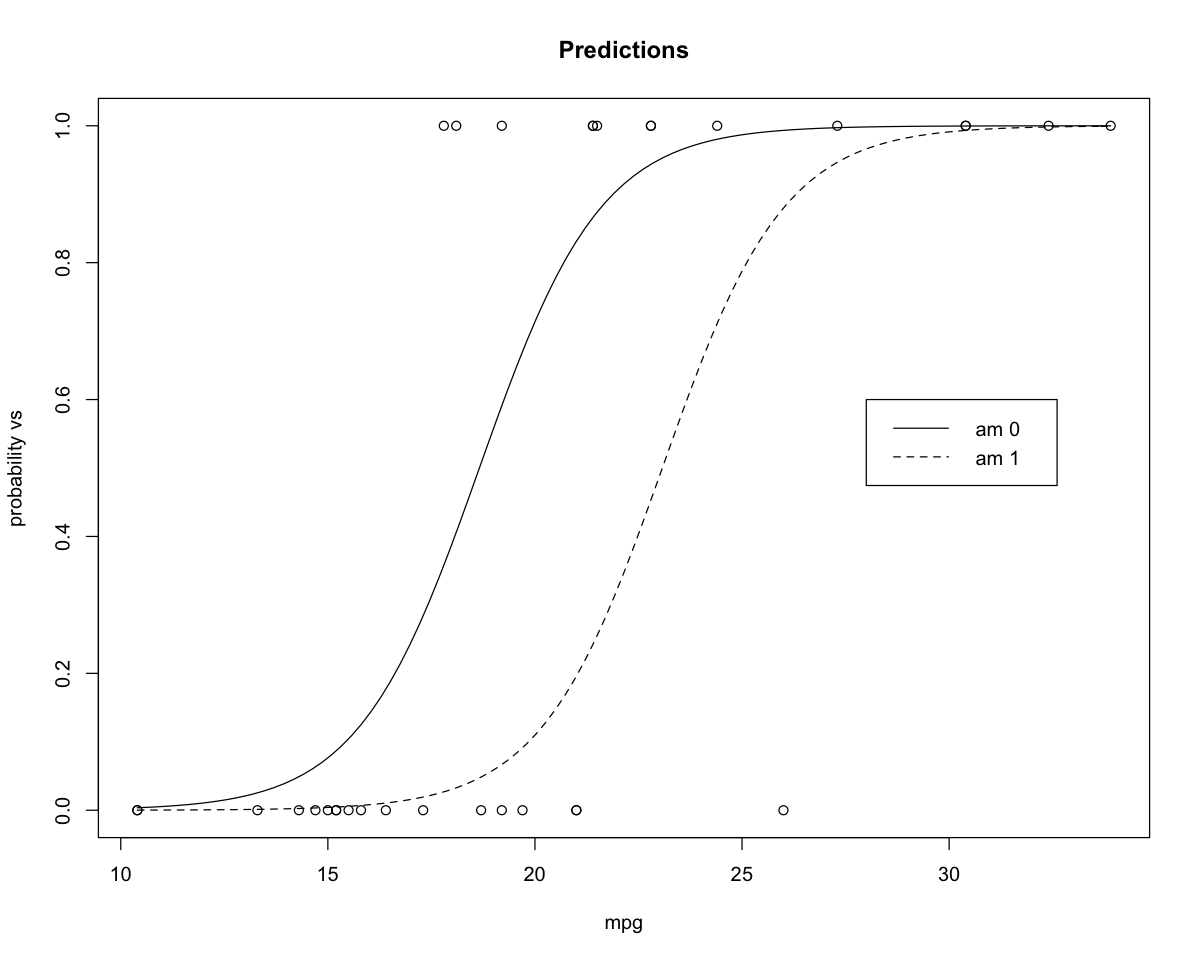

In [169]:
options(repr.plot.width = 10, repr.plot.height =8)

plot(cars.data$mpg, cars.data$vs, xlab='mpg', ylab='probability vs', main='Predictions')
curve(predict(model.cars2, newdata=data.frame(mpg=x, am="0"),
type='response'), add=TRUE)
curve(predict(model.cars2, newdata=data.frame(mpg=x, am="1"),
type='response'), add=TRUE, lty=2)
legend(28, 0.6, lty=c(1,2), legend=c('am 0','am 1'))

we see that the probability of vs is higher for am=0 than for am=1. In fact fix mpg =25 for example we meet befor the curve of am1 then am2 so the probability is less.

In [168]:
#plot the prediction
#options(repr.plot.width = 10, repr.plot.height =8)

#plot(my.data$x, my.data$y, xlab='nome covariate', ylab='probability of nome response', main='Predictions', col="black")
#curve(predict(best model.mydata, newdata=data.frame(nome_covariate=x, dichatomic_variable_x2="0"),
#type='response'), add=TRUE, col="blue")
#curve(predict(best model.mydata, newdata=data.frame(nome_covariate=x, dichatomic_variable_x2="1"),
#type='response'), add=TRUE, col="red")
#legend(28, 0.6, lty=c(1,2), legend=c('dichatomic_variable_x2 0','dichatomic_variable_x2 1'))

##COMMENTARE TIPO FRASE SOPRA PER SPIEGARE PLOT

#### comment:

In [171]:
preds<-rep(0,nrow(cars.data))
preds[est.probs>0.5]<-1

In [ ]:
#creare il vettore di 0 e 1 per le predizioni in modo da verificare la confusion matrix

#preds<-rep(0,nrow(mydata))
#preds[est.probs>0.5]<-1

In [172]:
addmargins(table(preds,vs=cars.data$vs))

,0,1,Sum
0,15,4,19
1,3,10,13
Sum,18,14,32


In [173]:
#confusion matrix
#addmargins(table(preds,y=mydata$y))

#training error rate: somma della diagonale da dx a sx/ numero totale di osservazioni
# sensitivity: (valore cella 1-1)/ totale 1 (ad esempio sopra 10/14)

# specificity: (valore cella 0-0)/ totale 0 (ad esempio sopra 15/18)

- training error rate is: ...  
- sensitivity is: ...  
- specitivity is: ...

#### comment:..

In [174]:
n <- nrow(cars.data)
set.seed(222)
selection <- sample(n, 0.60*n, replace=FALSE)
selection

[1] 29 30 15 18 23 24 22 20  9 10 27 32  1 14  7 26 12 13 28

In [175]:
training.set <- cars.data[selection, ]
test.set <- cars.data[-selection, ]

In [176]:
### creating test set and training


#n<-nrow(mydata)
#set.seed(222)
#selection <- sample(n, 0.60*n, replace=FALSE)
#selection

#training and test

#training.set <- mydata[selection, ]
#test.set <- mydata[-selection, ]

In [177]:
model.cars.train <- glm(vs ~ mpg + am, data=training.set, family=binomial)
summary(model.cars.train)



Call:
glm(formula = vs ~ mpg + am, family = binomial, data = training.set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7215  -0.3973  -0.2137   0.1510   1.8971  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -11.9872     5.1372  -2.333   0.0196 *
mpg           0.6180     0.2859   2.162   0.0306 *
am1          -2.8559     2.4158  -1.182   0.2371  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 25.008  on 18  degrees of freedom
Residual deviance: 10.414  on 16  degrees of freedom
AIC: 16.414

Number of Fisher Scoring iterations: 6


In [ ]:
## fit the model with the training set

#model.mydata.train <- glm(y ~ x1 + x2  (formula del best model), data=training.set, family=binomial)
#summary(model.mydata.train)

In [178]:
probs.test <- predict(model.cars.train, newdata=test.set, type='response')
preds.test <- rep(0, length(probs.test))
preds.test[probs.test>0.5] <- 1

In [179]:
### prediction based on test set

#probs.test <- predict(model.mydata.train, newdata=test.set, type='response')
#preds.test <- rep(0, length(probs.test))
#preds.test[probs.test>0.5] <- 1

In [180]:
addmargins(table(preds.test, vs=test.set$vs))

,0,1,Sum
0,6,3,9
1,0,4,4
Sum,6,7,13


In [ ]:
## model evaluation

#addmargins(table(preds.test, vs=test.set$vs))

#COMMENTARE

- test error rate is: ...  
- sensitivity is: ...  
- specitivity is: ...

#### comment:..

## Classification with LDA and QDA

### YOU CAN USE THIS FOR THE CLASSIFICATION WITH DIFFERENT CLASSES (K>=2)!!

### LDA steps:
- fit the model with $lda()$ function (maybe you can use just the structure of the best model obtained in the previous analysis considering the training set)

- extract the prior probabilities and the number of zeros and ones
- plot the histogram based on discriminant functions (the number of discriminant functions is K-1, with k classes)
- compute the prediction and the misclassification table

### ROC CURVE
- plot the roc curve as for the LDA as for Logistic regression best model and compare the differents AUC. The greatest one is associated to the best model

### QDA steps:
- fit the model with $qda()$ function (maybe you can use just the structure of the best model obtained in the previous analysis considering the training set)
- compute the prediction and the misclassification table

### ROC CURVE
- plot the roc curve  for the QDA compare the differents AUC with the others computed before.

In [183]:
## upload the library
library(MASS)

In [184]:
model.cars.lda <- lda(vs ~ mpg + am, data=training.set)
model.cars.lda

Call:
lda(vs ~ mpg + am, data = training.set)

Prior probabilities of groups:
        0         1 
0.6315789 0.3684211 

Group means:
       mpg       am1
0 16.67500 0.3333333
1 26.77143 0.7142857

Coefficients of linear discriminants:
           LD1
mpg  0.2800376
am1 -1.2023035

In [185]:
## fit with lda


#model.mydata.lda <- lda(y ~ x1 + x2, data=training.set)
#model.mydata.lda

In [187]:
## extract the prior probabilities
model.cars.lda$prior

## extract the number of zeros and ones
model.cars.lda$counts

0         1 
0.6315789 0.3684211

0  1 
12  7

In [188]:
## extract the prior probabilities
#model.mydata.lda$prior

## extract the number of zeros and ones
#model.mydata.lda$counts

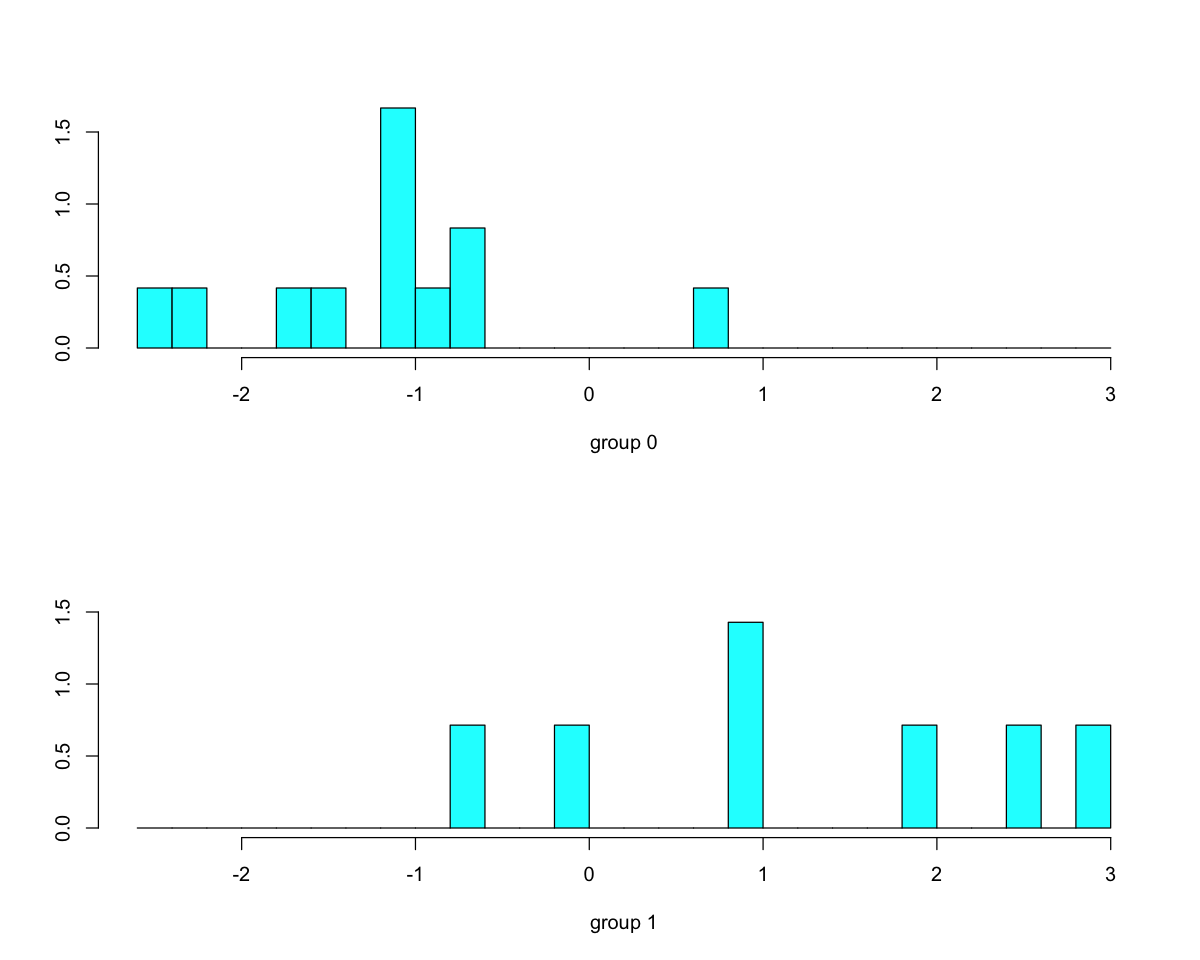

In [193]:
plot(model.cars.lda)

Groups are not well differentiated, as histograms partially overlap.

In [194]:
# plot 

#plot(model.mydata.lda)

#COMMENTARE 


#### comment:
if the discriminant function is a good function we can separate very good the two histograms otherwise not. In the case above we see a partially overleapping meaning that the discriminant function is not so good

In [196]:
preds.lda <- predict(model.cars.lda, test.set)
preds.lda

,0,1
Mazda RX4 Wag,0.91493012,0.085069877
Datsun 710,0.76513786,0.234862143
Hornet 4 Drive,0.32328453,0.676715471
Hornet Sportabout,0.74130416,0.258695841
Valiant,0.81013134,0.189868663
Merc 240D,0.06126945,0.938730545
Merc 280C,0.83887979,0.161120209
Lincoln Continental,0.99858596,0.001414042
Chrysler Imperial,0.97603249,0.023967512
Honda Civic,0.02060067,0.979399335


In [ ]:
# prediction on the test set (it provides class:prediction, posterior probabilities of belong to each group , value of discriminant funct)

#preds.lda <- predict(model.mydata.lda, test.set)
#preds.lda

In [197]:
preds.lda1 <- rep(0, nrow(test.set))
preds.lda1[preds.lda$posterior[,2]>0.5] <- 1
addmargins(table(predictions=preds.lda1, vs=test.set$vs))

,0,1,Sum
0,6,3,9
1,0,4,4
Sum,6,7,13


In [198]:
# prediction on the test set (it provides class:prediction, posterior probabilities of belong to each group , value of discriminant funct)

#preds.lda <- predict(model.mydata.lda, test.set)
#preds.lda

## missclassification table

#preds.lda1 <- rep(0, nrow(test.set))
#preds.lda1[preds.lda$posterior[,2]>0.5] <- 1
#addmargins(table(predictions=preds.lda1, y=test.set$y))

- test error rate is: ...  
- sensitivity is: ...  
- specitivity is: ...

#### comment:..

In [201]:
library(pROC)


Call:
roc.default(response = test.set$vs, predictor = preds.lda$posterior[,     2])

Data: preds.lda$posterior[, 2] in 6 controls (test.set$vs 0) < 7 cases (test.set$vs 1).
Area under the curve: 0.8571

[1] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.8571429 0.7142857
 [8] 0.5714286 0.5714286 0.5714286 0.4285714 0.2857143 0.1428571 0.0000000

[1] 0.0000000 0.1666667 0.3333333 0.5000000 0.6666667 0.6666667 0.6666667
 [8] 0.6666667 0.8333333 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000

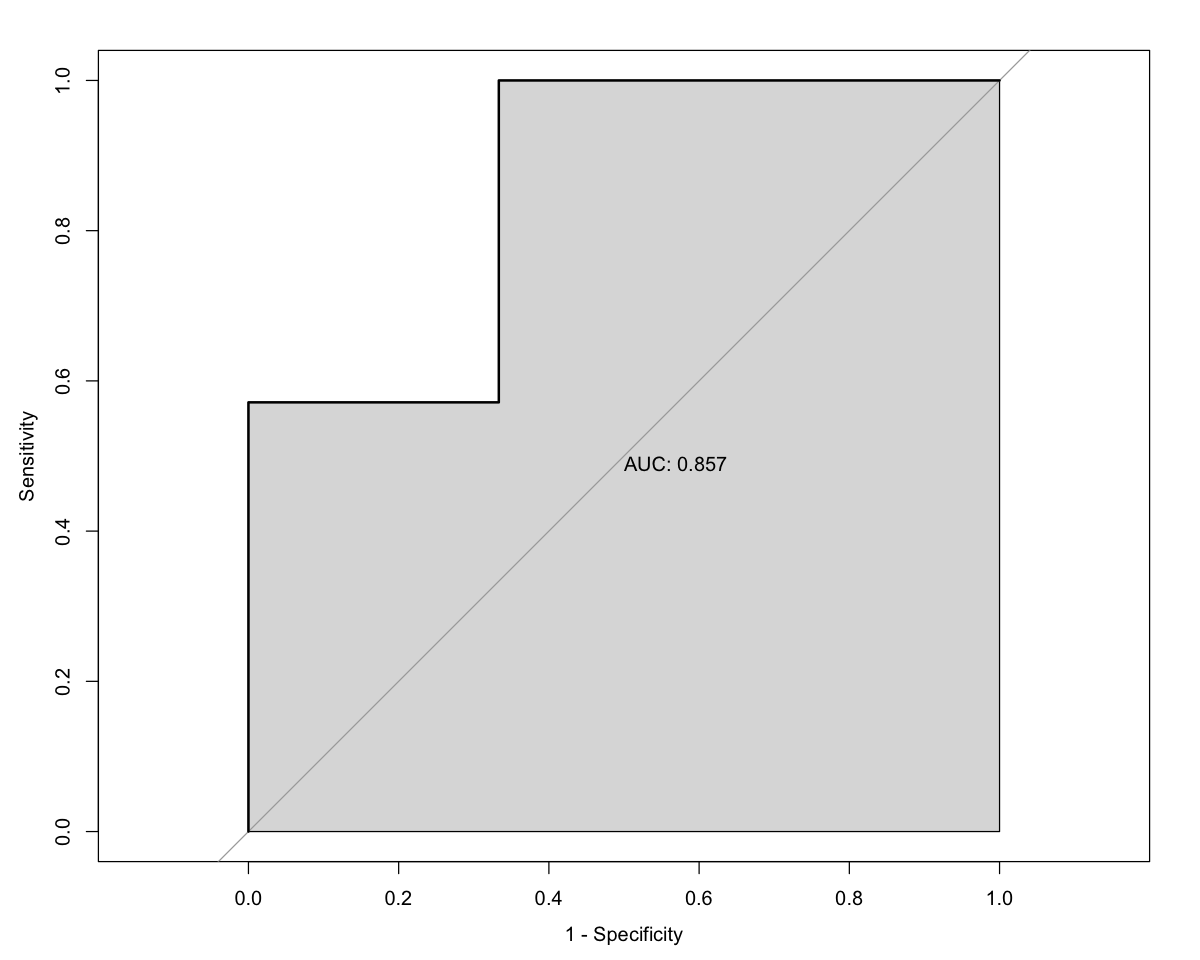

In [213]:
values.roc <- roc(test.set$vs, preds.lda$posterior[,2] )
values.roc

values.roc$sensitivities

values.roc$specificities

plot(values.roc, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE,
        auc.polygon=TRUE)

In [ ]:
## ROC curve
#library(pROC)

#values.roc <- roc(test.set$y, preds.lda$posterior[,2] )
#values.roc

#values.roc$sensitivities

#values.roc$specificities

#plot(values.roc, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon=TRUE)

# COMMENTARE

#### comment:
we plot the roc curve and the sensitivities and specificities. We se that AUC is equal to ... IMPORTANTE->as much closer AUC is to 1 much the model is good


Call:
roc.default(response = test.set$vs, predictor = probs.test)

Data: probs.test in 6 controls (test.set$vs 0) < 7 cases (test.set$vs 1).
Area under the curve: 0.8571

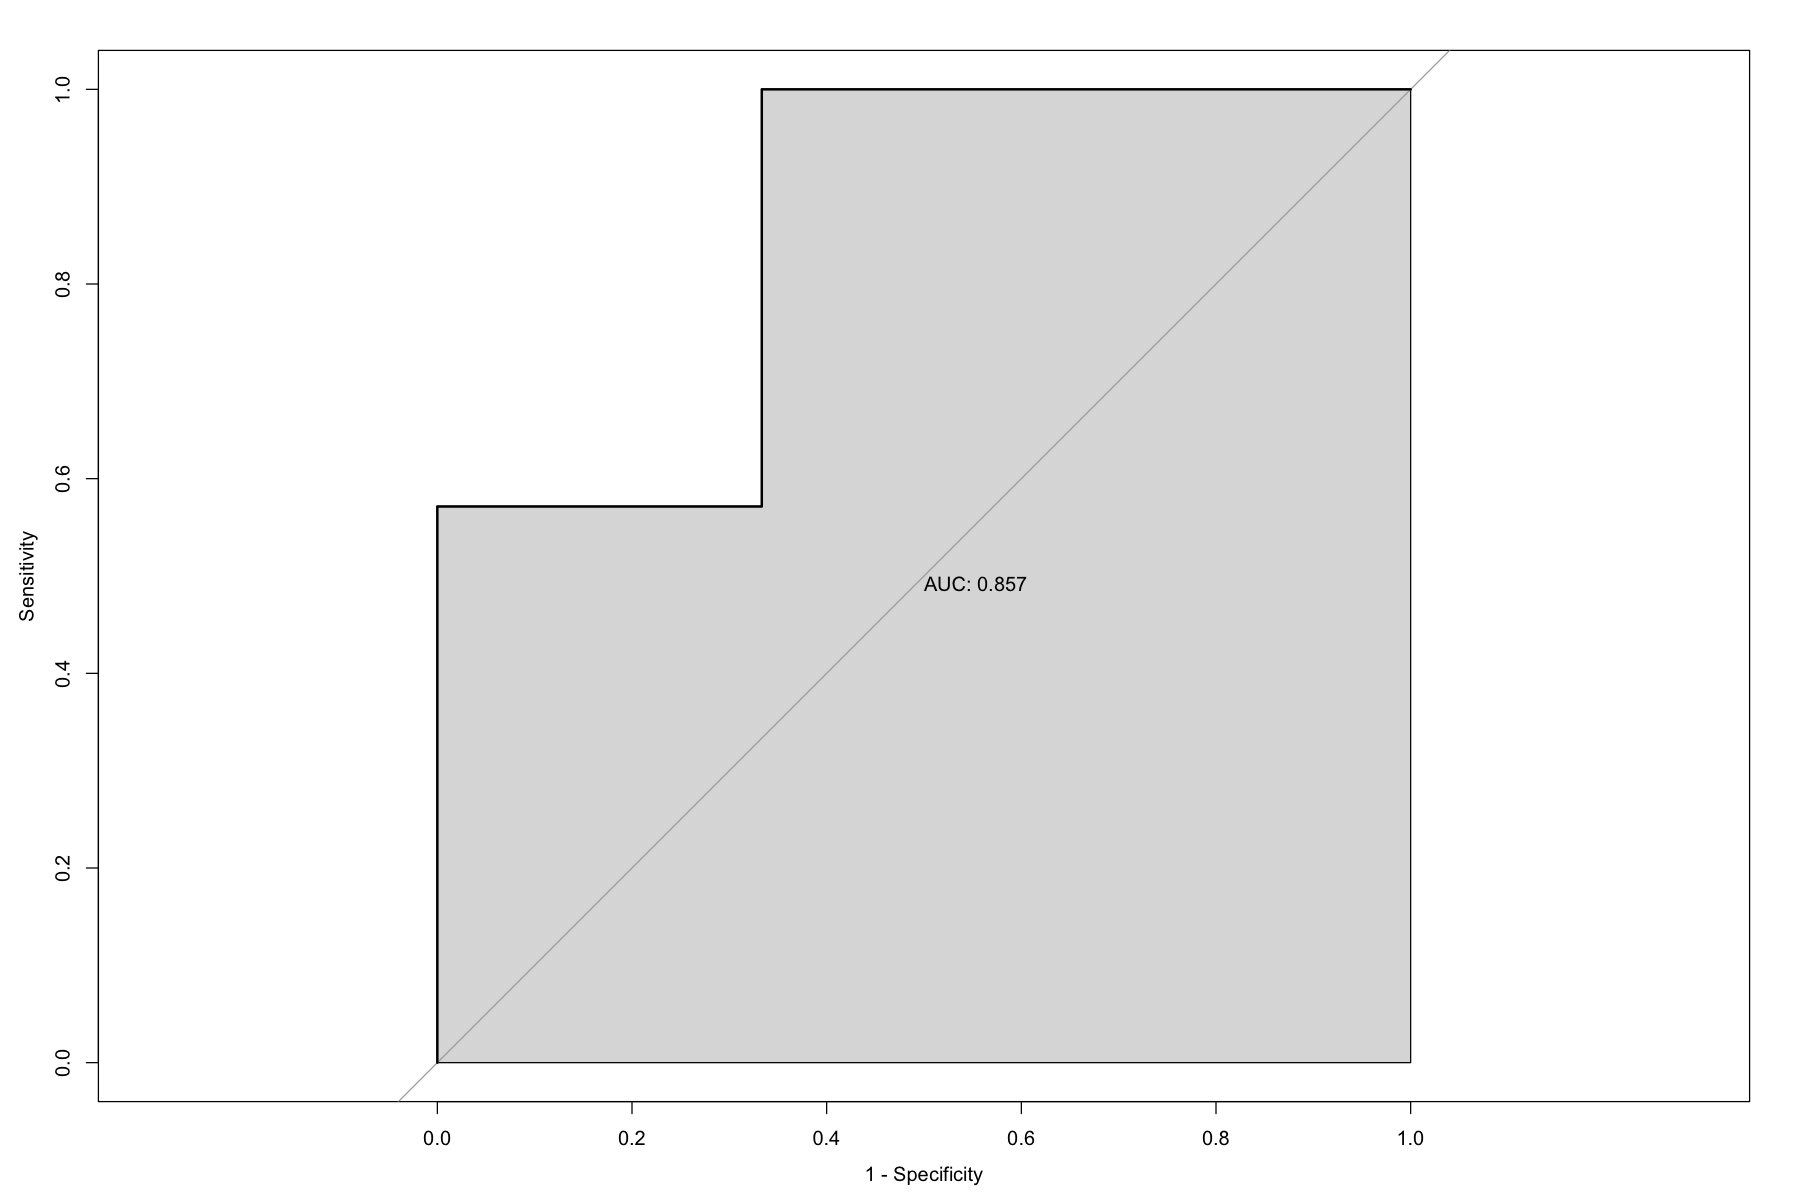

In [225]:
values.roc.logistic <- roc(test.set$vs, probs.test)
values.roc.logistic

plot(values.roc.logistic, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon=TRUE,ylim=c(0,1))


In [226]:
## ROC curve
#library(pROC)

#cat("LDA ROC")
#values.roc <- roc(test.set$y, preds.lda$posterior[,2] )
#values.roc

#values.roc$sensitivities

#values.roc$specificities


#cat("\n")

## roc curve for logistic regression


#cat("LOGISTIC REGRESSION ROC")
#values.roc <- roc(test.set$y, probs.test )
#values.roc


#par(mfrow=c(1,2))
#options(repr.plot.width = 15, repr.plot.height = 10)
#plot(values.roc, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon=TRUE)
#plot(values.roc, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE, auc.polygon=TRUE)

# COMMENTARE

#### comment:
we can see that the AUC values of roc curve are:
- ... for LDA
- ... for Logistic Regression

we know that as much closer AUC is to 1 much the model is good, so in this case ... Furthermore since the AUC of LDA is greater/smaller/equal to Logistic Regression's one we can say that LDA model is better/worse/same performance of logistic regression's one

In [227]:
model.cars.qda <- qda(vs ~ mpg + am, data=training.set)
model.cars.qda

Call:
qda(vs ~ mpg + am, data = training.set)

Prior probabilities of groups:
        0         1 
0.6315789 0.3684211 

Group means:
       mpg       am1
0 16.67500 0.3333333
1 26.77143 0.7142857

In [228]:
## fit with qda
#model.mydata.qda <- qda(y ~ x1 + x2, data=training.set)
#model.mydata.qda

In [232]:
preds.qda <- predict(model.cars.qda, test.set)
preds.qda

cat("Misclassification table")
addmargins(table(predictions=preds.qda$class, vs=test.set$vs))

,0,1
Mazda RX4 Wag,0.88665901,0.11334099
Datsun 710,0.73446597,0.26553403
Hornet 4 Drive,0.24357714,0.75642286
Hornet Sportabout,0.70947569,0.29052431
Valiant,0.78092453,0.21907547
Merc 240D,0.01787869,0.98212131
Merc 280C,0.81005315,0.18994685
Lincoln Continental,0.97813834,0.02186166
Chrysler Imperial,0.94881559,0.05118441
Honda Civic,0.00254748,0.99745252


Misclassification table

,0,1,Sum
0,6,3,9
1,0,4,4
Sum,6,7,13


In [233]:
# prediction and missclassification table
#preds.qda <- predict(model.mydata.qda, test.set)
#preds.qda

#cat("Misclassification table")
#addmargins(table(predictions=preds.qda$class, y=test.set$y))

- test error rate is: ...  
- sensitivity is: ...  
- specitivity is: ...

#### comment:..
On the basis of this test set the performance of LDA and that of QDA are similar/different in terms of test error rate. Thus, we prefer LDA given its simplicity if compared to QDA if they are similar.

If they are very different we prefer the one with smallest  test error rate.

In [235]:
values.roc <- roc(test.set$vs, preds.qda$posterior[,2] )
values.roc


Call:
roc.default(response = test.set$vs, predictor = preds.qda$posterior[,     2])

Data: preds.qda$posterior[, 2] in 6 controls (test.set$vs 0) < 7 cases (test.set$vs 1).
Area under the curve: 0.8571

In [ ]:
## roc curve for qda

#values.roc <- roc(test.set$vs, preds.qda$posterior[,2] )
#values.roc

#### comment:..
Since the roc curve for QDA is greater/smaller/equal to the one of LDA and greater/smaller/equal wrt the one of logistic regression we can say:
- if equal : no matter what approach we apply we are going to obtain the same results and the results are good/bad( depend on test error rate and AUC)
- if different: the best approach is the one that leads to the smallest test erro and AUC, in this case...



## CLASSIFICATION WITH A QUANTITATIVE COVARIATE THAT HAS GOT K>2 CLASSES

- create dataset ecc as usal
- rename the dichatomic variable in order to have a better comprehension and and boxplot them wrt the other covariates
- mosaic plot
- logistic regression with all covariates and interactions
- compute accuracy
- try logistic regression with a model without interactions using a simplify model in order to check if we got a better result
- compare the two model usign $anova()$ and decide the best one
- try logistic regression with polynomial for all the covariates that are not quantitative and decide which one keep and perform again the polynomial
- compare the two polynomials model
- compare the best polynomial model with the non-polynomial obtained before
- compute the estimated values and the predictions in terms of probability
- roc curve
- if it gives you some values for the covariates and you want to predict the probability for the y


In [237]:
library(ISLR)
data(Auto)
dim(Auto)

[1] 392   9

In [251]:
median.mpg <- median(Auto$mpg)
## create a vector as long as the number of cars and composed by ones
new.mpg <- rep(1, length(Auto$mpg))
## substitute 0 to the ones corresponding to cars with mpg lower than the med
new.mpg[Auto$mpg < median.mpg] <- 0
## create the dataset we need
new.auto <- data.frame(new.mpg=new.mpg,
        Auto[,c('displacement', 'horsepower', 'origin')])

is.factor(new.auto$origin)
new.auto$origin <- as.factor(new.auto$origin)
levels(new.auto$origin) <- c('America', 'Europe', 'Japan')

[1] FALSE

In [252]:
## rename the columns
#levels(mydata$x_dich_variable_classe)<- c("nome1","nome 2","nome 3", ecc)

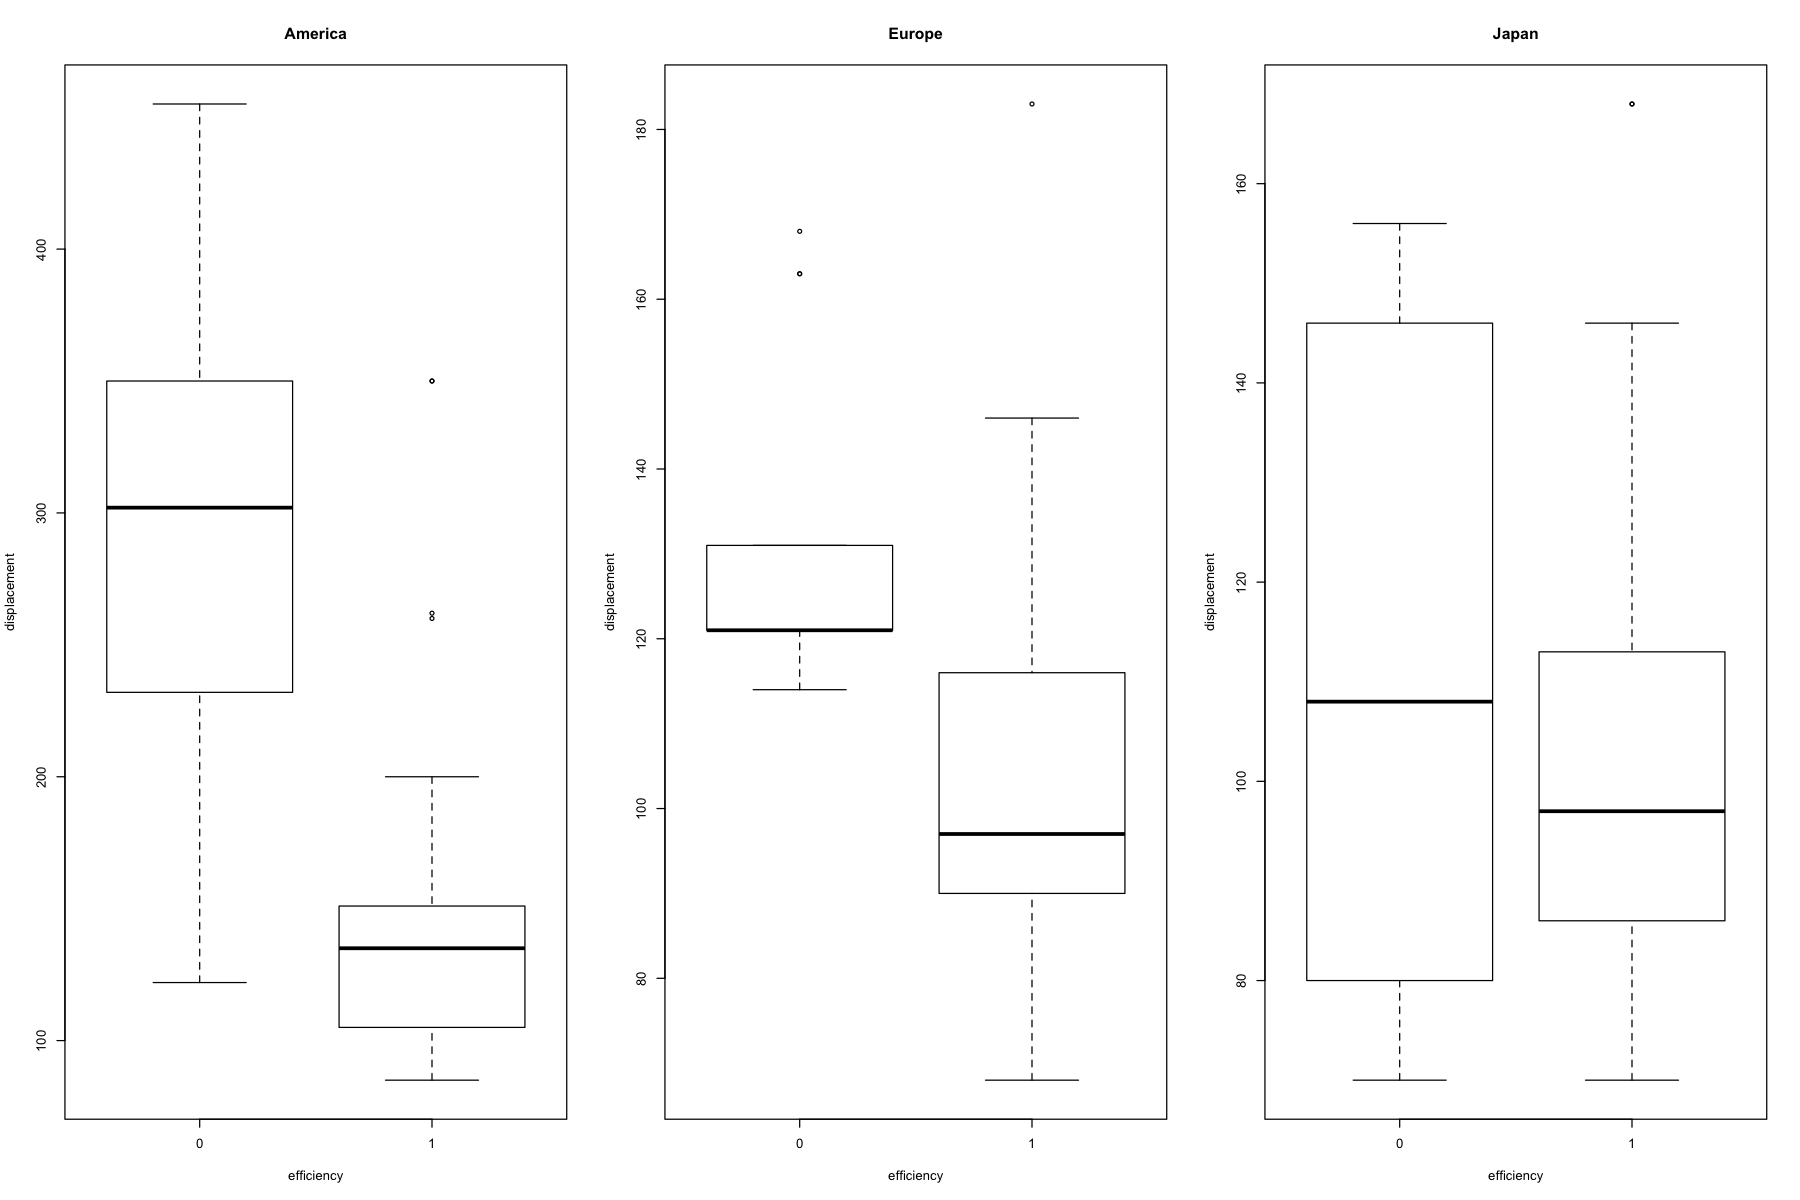

In [257]:
## Relationship with displacement and origin
par(mfrow=c(1,3))
boxplot(displacement~new.mpg, data=new.auto,
        subset=new.auto$origin=='America', main='America', xlab='efficiency',
                ylab='displacement')
boxplot(displacement~new.mpg, data=new.auto,
        subset=new.auto$origin=='Europe', main='Europe', xlab='efficiency',
                ylab='displacement')
boxplot(displacement~new.mpg, data=new.auto,
        subset=new.auto$origin=='Japan', main='Japan', xlab='efficiency',
                ylab='displacement')

seems to be less efficient then the other 2 country in fact you have got aa very high displacement associated wrt the other 2 countries ( in europe 180 in japan 160 while in america 400)

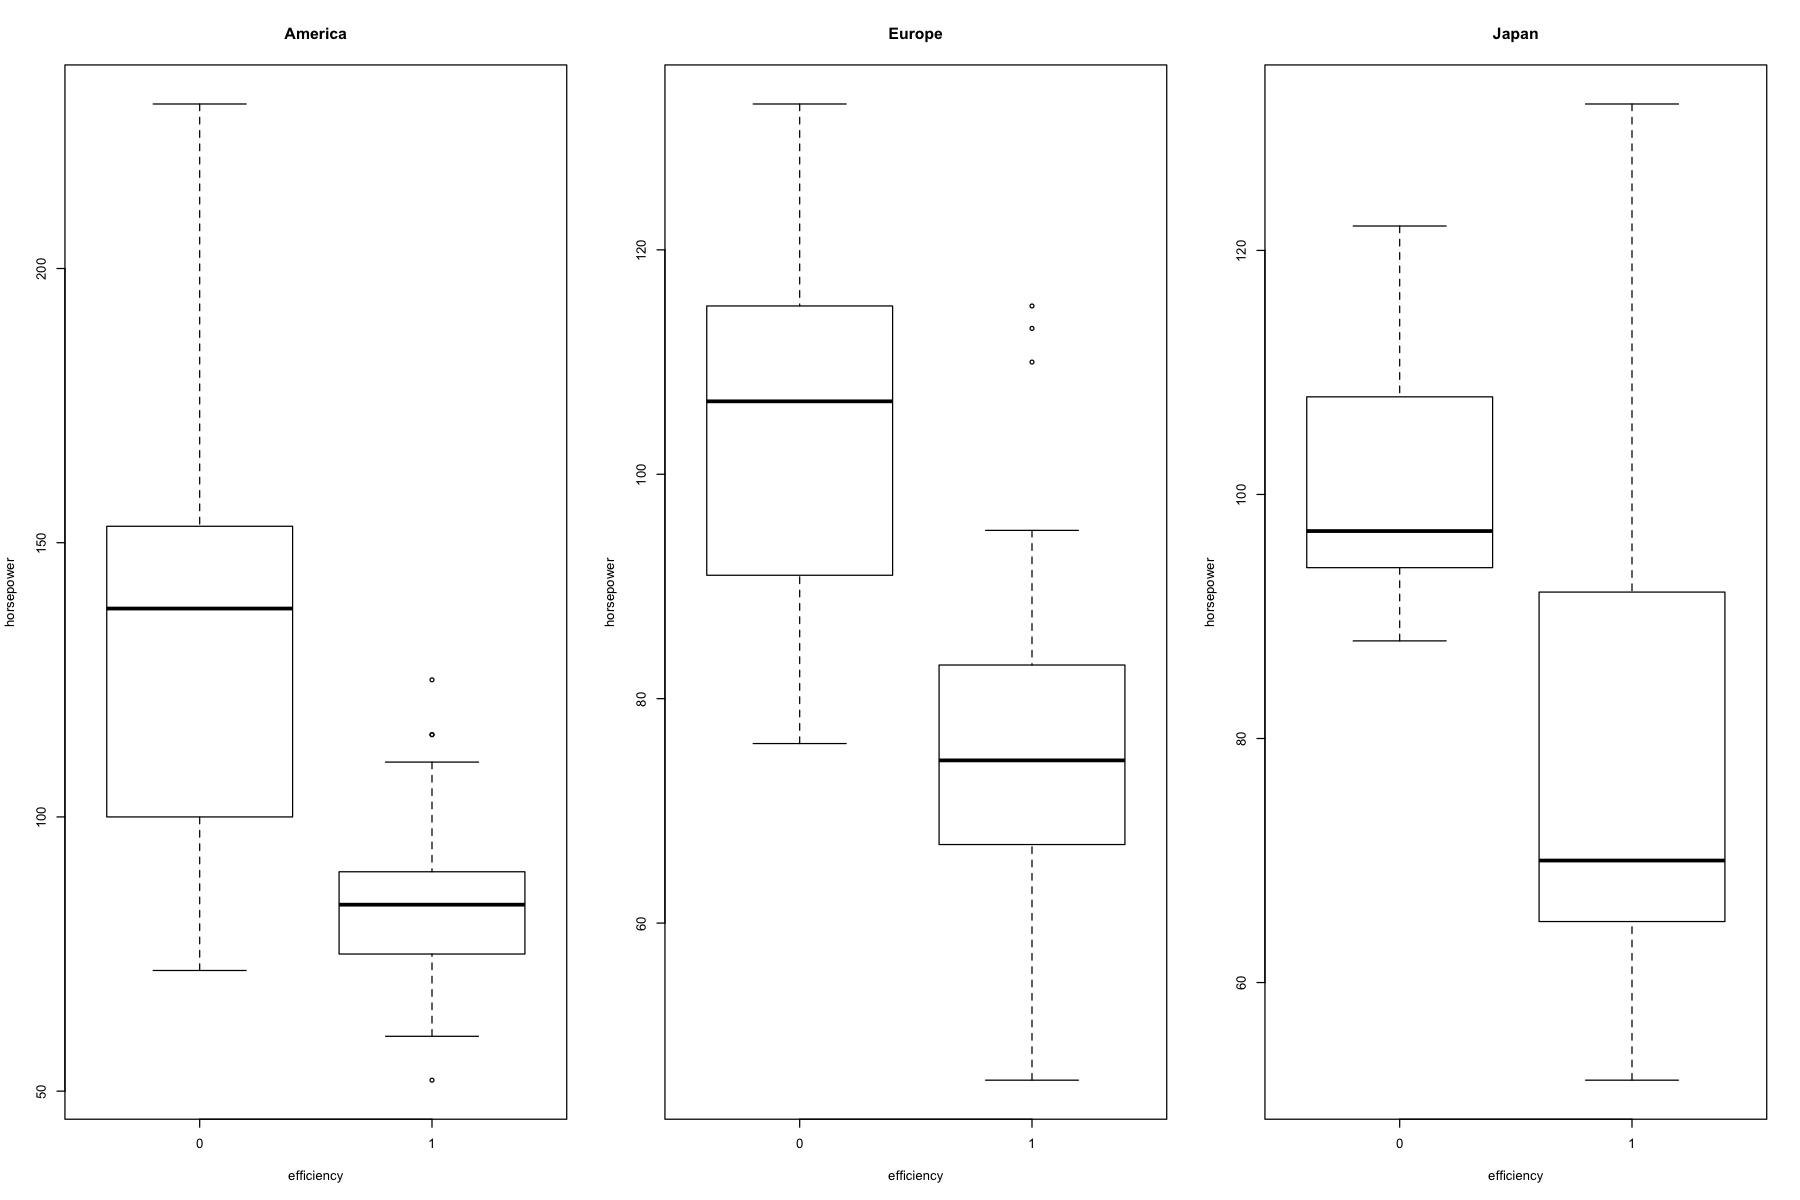

In [259]:
## Relationship between horsepower and origin
par(mfrow=c(1,3))
boxplot(horsepower~new.mpg, data=new.auto,
        subset=new.auto$origin=='America', main='America', xlab='efficiency',
                ylab='horsepower')
boxplot(horsepower~new.mpg, data=new.auto,
        subset=new.auto$origin=='Europe', main='Europe', xlab='efficiency',
                ylab='horsepower')
boxplot(horsepower~new.mpg, data=new.auto,
        subset=new.auto$origin=='Japan', main='Japan', xlab='efficiency',
                ylab='horsepower')

In [258]:
## boxplot for different classes wrt other variables x and Y dichatomic

#variable x1 (NOT DICHATOMIC x1)

#par(mfrow=c(1,3))
#boxplot(x1~y, data=mydata,
        #subset=mydata$x_dich_variable_classe=='nome1', main='nome1', xlab='y',
                #ylab='x')
#boxplot(x1~y, data=mydata,
        #subset=mydata$x_dich_variable_classe=='nome2', main='nome2', xlab='y',
                #ylab='x')
#boxplot(x1~y, data=mydata,
        #subset=mydata$x_dich_variable_classe=='nome2', main='nome2', xlab='y',
                #ylab='x')

In [ ]:
## boxplot for different classes wrt other variables x and Y dichatomic

#variable x2 (NOT dichatomic x2)

#par(mfrow=c(1,3))
#boxplot(x2~y, data=mydata,
        #subset=mydata$x_dich_variable_classe=='nome1', main='nome1', xlab='y',
                #ylab='x')
#boxplot(x2~y, data=mydata,
        #subset=mydata$x_dich_variable_classe=='nome2', main='nome2', xlab='y',
                #ylab='x')
#boxplot(x2~y, data=mydata,
        #subset=mydata$x_dich_variable_classe=='nome2', main='nome2', xlab='y',
                #ylab='x')


#and so on for all the covariates that are not dichatomics

#### comment

         
            0   1
  America 173  72
  Europe   14  54
  Japan     9  70

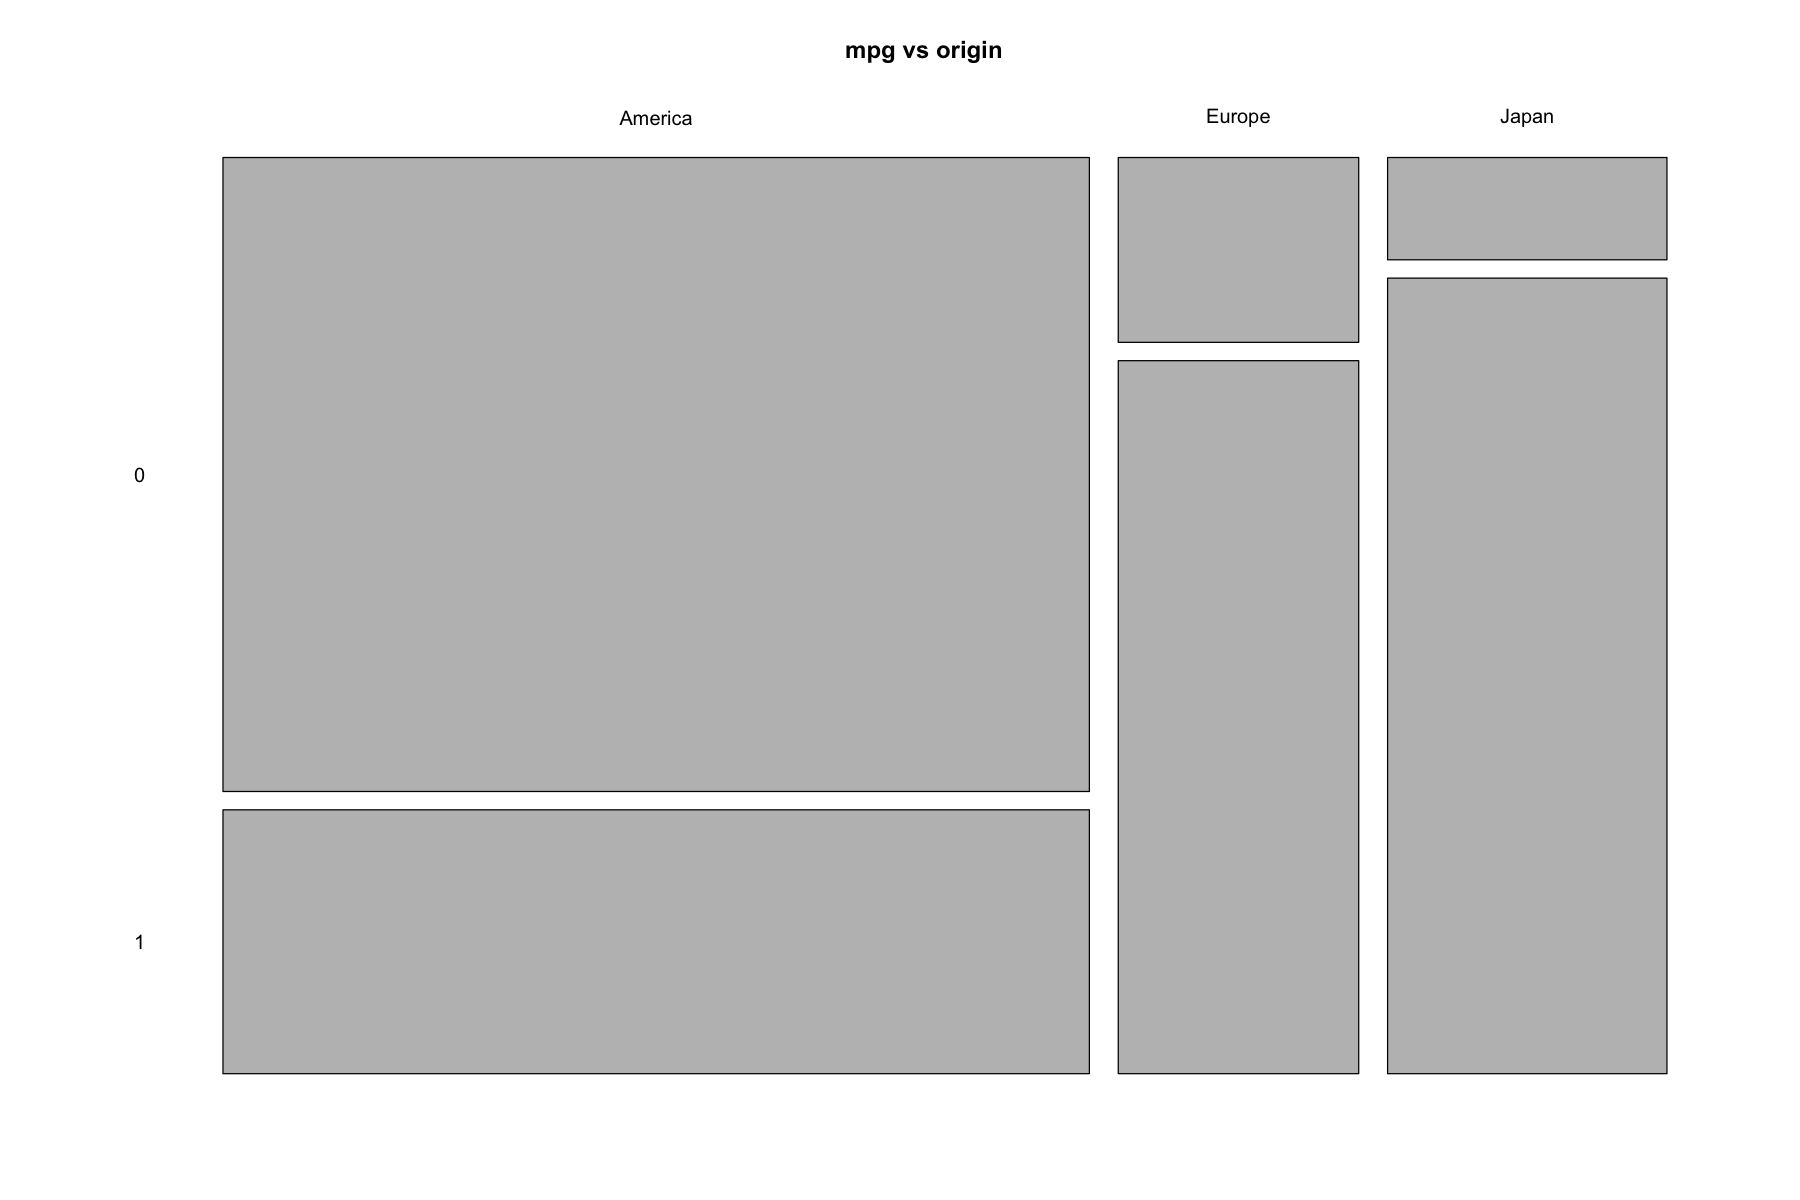

In [268]:
## Relationship with origin...it is a graph based on the distribution ## of two qualitative variables
mosaicplot(table(new.auto$origin, new.auto$new.mpg), las=1,
        cex.axis=1, main='mpg vs origin')

table(new.auto$origin, new.auto$new.mpg)

In [269]:
## mosaic plot
#mosaicplot(table(mydata$x_dich_variable_classe, mydata$y), las=1,
        #cex.axis=1, main=' x_dich_variable_classe vs y',color="lightblue")

## associated table
# table(mydata$x_dich_variable_classe, mydata$y)

In [272]:
m.auto <- glm(new.mpg ~ displacement*origin + horsepower*origin,
        data=new.auto, family=binomial)
summary(m.auto)

#accuracy
1-pchisq(195.72, 383)


Call:
glm(formula = new.mpg ~ displacement * origin + horsepower * 
    origin, family = binomial, data = new.auto)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2641  -0.2329   0.0196   0.3525   3.5625  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                6.953352   1.537970   4.521 6.15e-06 ***
displacement              -0.035372   0.006123  -5.777 7.61e-09 ***
originEurope               6.932632   4.039343   1.716 0.086111 .  
originJapan                1.357005   2.910867   0.466 0.641083    
horsepower                -0.007337   0.020693  -0.355 0.722903    
displacement:originEurope  0.001796   0.023289   0.077 0.938522    
displacement:originJapan   0.067139   0.019893   3.375 0.000738 ***
originEurope:horsepower   -0.089248   0.035440  -2.518 0.011793 *  
originJapan:horsepower    -0.102000   0.039648  -2.573 0.010094 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispe

[1] 1

Despite origin and horsepower are non-significant, they are maintained inside the model and they are not eliminated as they appear in interaction with displacement and the interaction is significant (principle of hierarchy).

In [271]:
## logistic regression, with all covariates plus the interaction of the quantitative covariate 
## (covariate  with associated to different classes K)


#m.mydata <- glm(y ~ x1*x_dich_variable_classe + x2*x_dich_variable_classe,
        #data=mydata, family=binomial)
#summary(m.auto)


#accuracy
# 1-pchisq(residual deviance, degrees of freedom)

#### comment:
- vedere significatività variabili considerando il p-value stando attenti a non rimuovere le variabili se la loro interazione con altre è significativa (principio hierarchical)

- vedere se accuracy è alta o no


In [273]:
m.auto2 <- glm(new.mpg ~ displacement+origin + horsepower,
        data=new.auto, family=binomial)
summary(m.auto2)


Call:
glm(formula = new.mpg ~ displacement + origin + horsepower, family = binomial, 
    data = new.auto)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5074  -0.2000   0.0612   0.4299   3.5272  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   9.32907    1.21877   7.654 1.94e-14 ***
displacement -0.02630    0.00484  -5.434 5.52e-08 ***
originEurope -0.53263    0.51581  -1.033 0.301793    
originJapan   0.17794    0.56595   0.314 0.753216    
horsepower   -0.05074    0.01361  -3.728 0.000193 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 543.43  on 391  degrees of freedom
Residual deviance: 213.36  on 387  degrees of freedom
AIC: 223.36

Number of Fisher Scoring iterations: 7


In [274]:
## model without interactions

#m.mymodel2 <- glm(y ~ x1+ x_dich_variable_classe+ x2,
        #data=mydata, family=binomial)
#summary(m.mymodel2)

#accuracy
# 1-pchisq(residual deviance, degrees of freedom)

In [275]:
anova(m.auto2, m.auto, test='Chisq')

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
387,213.3637,NA,NA,NA
383,195.7192,4,17.64446,0.001447984


we can say that the second model is better 

In [ ]:
## compare model based on anova

#anova(m.mydata2, m.mydata, test='Chisq')

#### comment:

decide the model suggest from anova based on Pr(>chi)


In [277]:
m.auto3 <- glm(new.mpg ~ displacement*origin + I(displacement^2) +
        horsepower* origin + I(horsepower^2),
        data=new.auto, family=binomial)
summary(m.auto3)


Call:
glm(formula = new.mpg ~ displacement * origin + I(displacement^2) + 
    horsepower * origin + I(horsepower^2), family = binomial, 
    data = new.auto)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4232  -0.2826   0.0296   0.2819   2.3047  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                9.677e+00  5.110e+00   1.894   0.0583 .  
displacement              -1.310e-01  2.632e-02  -4.979 6.40e-07 ***
originEurope               1.641e+00  4.485e+00   0.366   0.7144    
originJapan               -4.437e+00  3.492e+00  -1.271   0.2039    
I(displacement^2)          2.396e-04  5.945e-05   4.031 5.55e-05 ***
horsepower                 1.298e-01  1.130e-01   1.149   0.2505    
I(horsepower^2)           -7.490e-04  5.321e-04  -1.408   0.1592    
displacement:originEurope  3.388e-02  2.579e-02   1.313   0.1890    
displacement:originJapan   1.143e-01  2.534e-02   4.510 6.48e-06 ***
originEurope:horsepow

Reject the quadratic term associated to horsepower.

In [ ]:
## polynomial

#m.mydata3 <- glm(y ~ x1*x_dich_variable_classe + I(x1^2) + x2* x_dich_variable_classe + I(x2^2),
        #data=mydata, family=binomial)
#summary(m.mydata3)

#### comment:

- remove terms that are note significant (maybe the quadratic ones) paying attention to hiericacl principle

In [278]:
m.auto4 <- glm(new.mpg ~ displacement*origin + I(displacement^2) +
        horsepower* origin,
        data=new.auto, family=binomial)
summary(m.auto4)


Call:
glm(formula = new.mpg ~ displacement * origin + I(displacement^2) + 
    horsepower * origin, family = binomial, data = new.auto)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3325  -0.2775  -0.0089   0.2818   2.7052  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                1.495e+01  3.224e+00   4.637 3.54e-06 ***
displacement              -9.932e-02  1.959e-02  -5.071 3.97e-07 ***
originEurope               1.527e+00  4.584e+00   0.333 0.739070    
originJapan               -4.214e+00  3.638e+00  -1.158 0.246750    
I(displacement^2)          1.634e-04  4.511e-05   3.623 0.000291 ***
horsepower                -3.072e-02  2.189e-02  -1.403 0.160507    
displacement:originEurope  2.162e-02  2.452e-02   0.882 0.377949    
displacement:originJapan   9.512e-02  2.191e-02   4.341 1.42e-05 ***
originEurope:horsepower   -6.260e-02  3.636e-02  -1.722 0.085093 .  
originJapan:horsepower    -8.467e-02  4.035e

In [ ]:
## polynomial removing useless variable

#m.mydata4 <- glm(y ~ ..... ,
        #data=mydata, family=binomial)
#summary(m.mydata4)

In [282]:
anova(m.auto3, m.auto4, test='Chisq')

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
381,182.5360,NA,NA,NA
382,185.4234,-1,-2.887416,0.089274


We maintain the model with the square of displacement.

In [ ]:
# cpmparison between two polynimials model
#anova(m.mydata3, m.mydata4, test='Chisq')

#### comment:
keep the best of two based on anova

In [279]:
anova(m.auto2, m.auto4, test='Chisq')

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
387,213.3637,NA,NA,NA
382,185.4234,5,27.94034,3.738938e-05


In [283]:
## comparison between model obtained before and polynomial

# anova(m.mydata2, m.mydata4, test='Chisq')

#### comment 
keep the best of two based on anova

In [286]:
est.values <- predict(m.auto4)
est.probs <- predict(m.auto, type='response')
preds <- rep(0, nrow(new.auto))
preds[est.probs>0.5] <- 1

addmargins(table(predictions=preds, mpg=new.auto$new.mpg))

# training error rate (in this case you dont use test error becaus you didn't split the data)
(15+20)/392

,0,1,Sum
0,176,15,191
1,20,181,201
Sum,196,196,392


[1] 0.08928571

In [287]:
## preds and training error rate

#est.values <- predict(m.mydata4)
#est.probs <- predict(m.mydata, type='response')
#preds <- rep(0, nrow(mydata))
#preds[est.probs>0.5] <- 1

#addmargins(table(predictions=preds, y=mydata$y))

- training error rate is: ...  
- sensitivity is: ...  
- specitivity is: ...

#### comment:..


Call:
roc.default(response = new.auto$new.mpg, predictor = est.probs)

Data: est.probs in 196 controls (new.auto$new.mpg 0) < 196 cases (new.auto$new.mpg 1).
Area under the curve: 0.9614

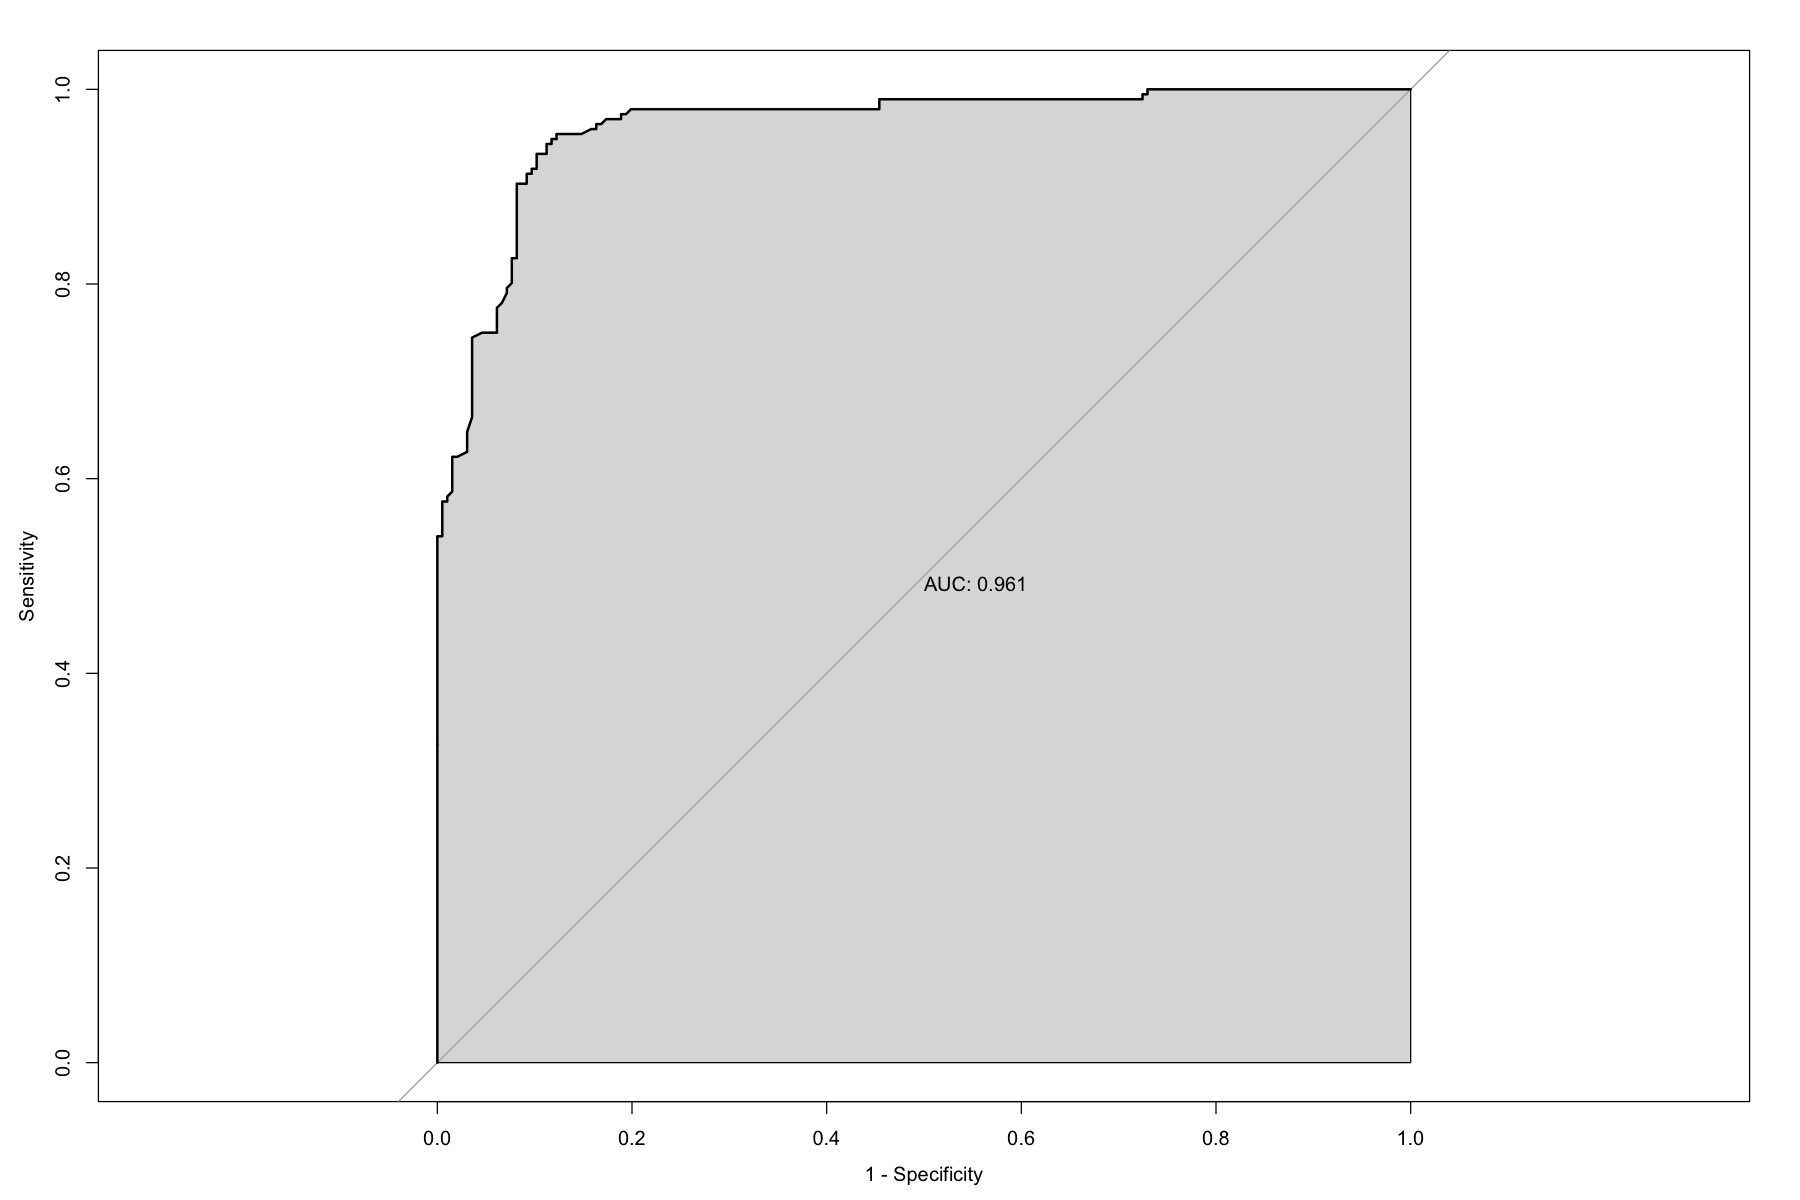

In [289]:
library(pROC)
curve.roc <- roc(new.auto$new.mpg, est.probs)
curve.roc

plot(curve.roc, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE,
        auc.polygon=TRUE)

In [ ]:
## plot roc curve

#library(pROC)
#curve.roc <- roc(mydata$y, est.probs)
#curve.roc

#plot(curve.roc, legacy.axes=TRUE, xlim=c(1.0, 0.0), print.auc=TRUE,
        #auc.polygon=TRUE)

#### comment 

the AUC is... so the model is..

In [290]:
predict(m.auto4, newdata=data.frame(horsepower=170, displacement=350,
        origin="Japan"), type='response')

1 
0.9999369

In [ ]:
## prediction if it gives you some variables values for nome 2

#predict(m.mydata4, mydata=data.frame(x1=170, x2=350,
        #x_dich_variable_classe="nome 2"), type='response')

## prediction if it gives you some variables values for nome 2

#predict(m.mydata4, mydata=data.frame(x1=170, x2=350,
        #x_dich_variable_classe="nome 1"), type='response')

#### comment

# CLASSIFICATION WITH RESPONSE VARIABLE Y WITH DIFFERENT CLASSES

- check the response variable in order to see how many classes you have and barplot them, pie plot
- plot all the scatterplot between the covariates
- since you have different class for Y you must use lda you can't use logistic regression considering all the covariates
- you wwill have k-1 discriminant function
- plot the lda regression
- plot the histogram to check the overlapping of prediction

In [14]:
# barplot
#barplot(table(mydata$Y), title="Different classe for y", xlab="type", ylab="count", col="lightblue")
#pie(table(mydata$Y))

In [ ]:
#scatter plot tra le covariabili (da colonna 2 in poi abbiamo le covariates )

#pairs(mydata[,colonna 2:colonna n])

In [ ]:
## lda with all the covariates
# mydata.lda <- lda(Type ~ ., data=mydata)

#### comment:
we see from proportion of trace that ld1 contains ..% of variability while ld2 ..%
The output includes the proportion of trace, that is the percentage of separation be- tween the observations obtained from each discriminant function.


In [ ]:
# plot lda-regression

#plot( mydata.lda)

#### comment:

check if you got an overlapping (non vuol dire che siano una sopra l'altra ma che siano nella stessa linea d'aria)
If we look from LD1 point of view you see the ..% of variability whereas from ld2 the ..%

In [ ]:
# plot hist

#mydata.prediction <- predict(mydata.lda)

#ld1
#ldahist(data = mydata.prediction$x[,1], g=mydata$Type)

#ld2
#ldahist(data = mydata.prediction$x[,2], g=mydata$Type)

#### comment:
if the discriminant function is a good function we can separate very good the two histograms otherwise not. In the case above we see a partially overleapping meaning that the discriminant function is not so good